# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #3: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 10.11.2017 00:00 OMSK**

#### Полезная литература

- https://matplotlib.org/gallery/index.html
- http://seaborn.pydata.org/examples/index.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from warnings import filterwarnings

filterwarnings('ignore')

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$, количество точек должно быть 1000.

In [4]:
x = np.linspace(0, 10, 1000)
y_cos = np.cos(x)
y_log = np.log(x)
y_sin_log = np.sin(x) * np.log(x)
y_line = np.random.random() * x

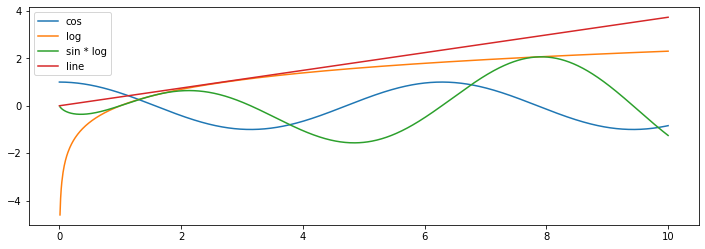

In [22]:
fig = plt.figure(figsize = (12, 4))
plt.plot(x, y_cos, label='cos')
plt.plot(x, y_log, label='log')
plt.plot(x, y_sin_log, label='sin * log')
plt.plot(x, y_line, label='line')
plt.legend(loc='best')
plt.show()

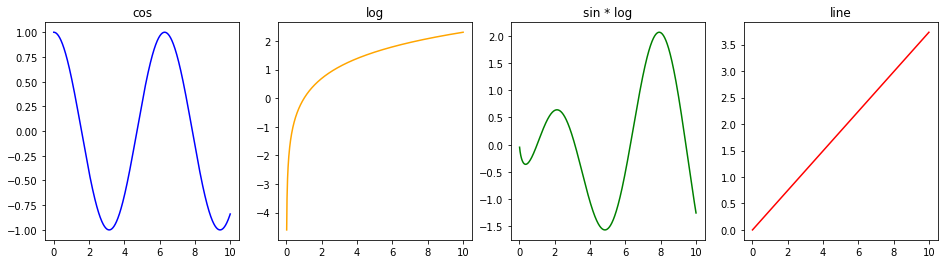

In [44]:
fig, axes = plt.subplots(1, 4, figsize = (16, 4))
axes[0].plot(x, y_cos, c='blue')
axes[0].set_title('cos')
axes[1].plot(x, y_log, c='orange')
axes[1].set_title('log')
axes[2].plot(x, y_sin_log, c='green')
axes[2].set_title('sin * log')
axes[3].plot(x, y_line, c='red')
axes[3].set_title('line')
plt.show()

2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

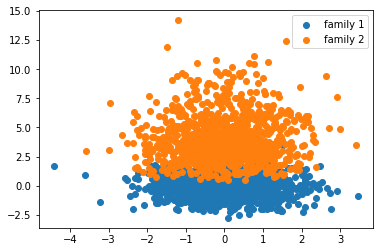

In [74]:
plt.scatter(np.random.randn(1000), np.random.randn(1000), label='family 1')
plt.scatter(np.random.randn(1000), np.random.gamma(4, size=1000), label='family 2')
plt.legend()

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [75]:
df = pd.read_csv('data/bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

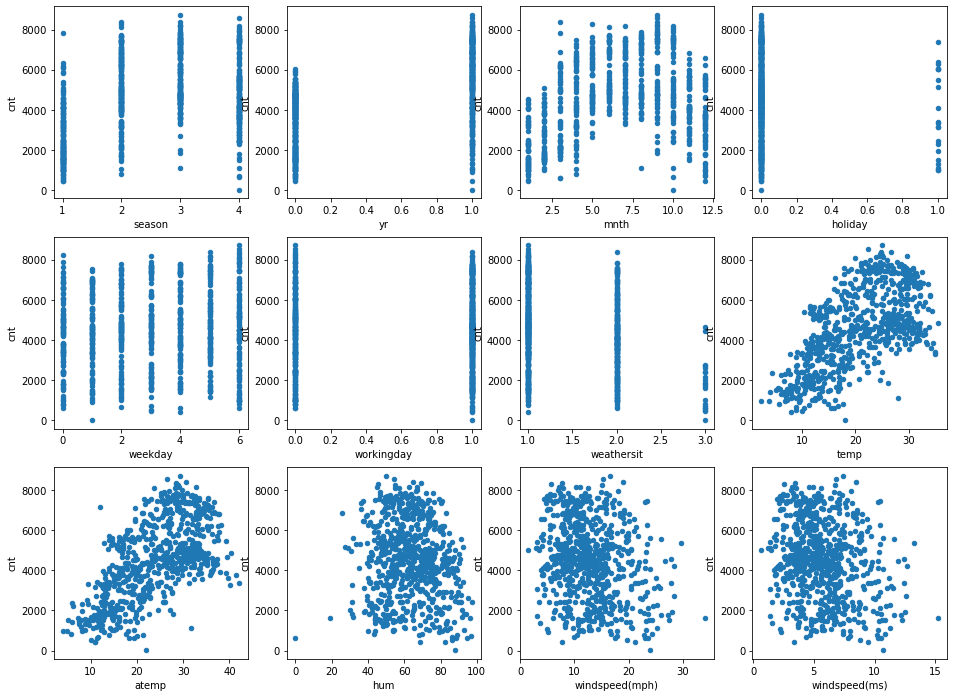

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: зависимость синусоидальная.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: температура (как фактическая, так и по ощущениям)

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

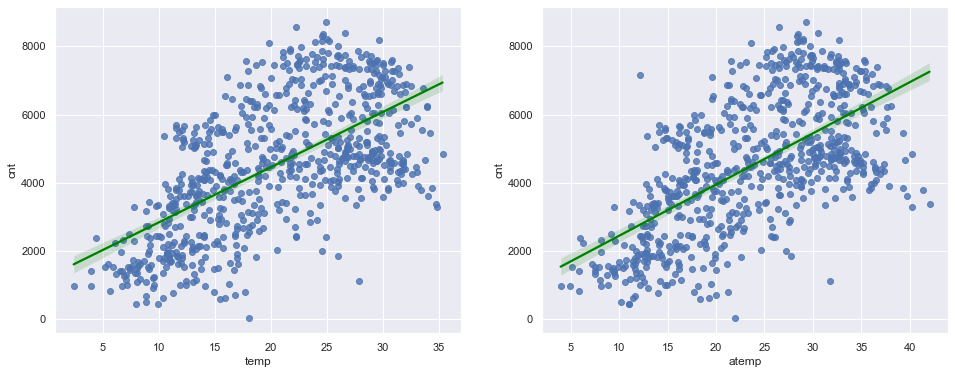

In [113]:
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.regplot(data=df, x='temp', y='cnt', line_kws={'color': 'green'}, ax=axes[0])
sns.regplot(data=df, x='atemp', y='cnt', line_kws={'color': 'green'}, ax=axes[1])

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ

<AxesSubplot:>

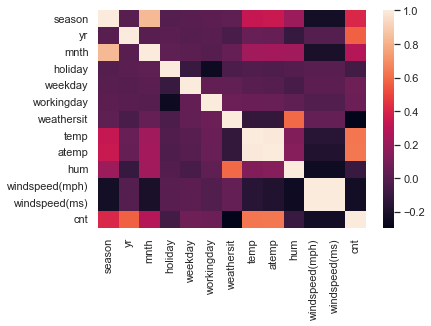

In [98]:
sns.heatmap(data=df.corr())

Меньше всего количество прокатов коррелирует влажностью и тем фактом, рабочий ли сегодня день. Слабая корреляция с тем, какой сегодня день недели. Наиболее сильная корреляция наблюдается с температурой и годом. Причем с годом не особо ясно, почему. Вероятно, открылись новые сервисы проката велосипедов/построили новые велодорожке/ведется пропаганда активного образа жизни.

In [118]:
df['yr'].value_counts()

1    366
0    365
Name: yr, dtype: int64

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: 

<AxesSubplot:xlabel='yr,mnth'>

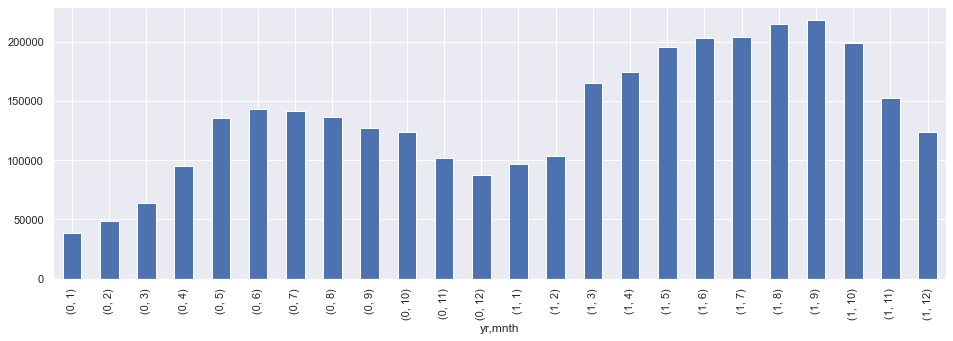

In [151]:
fig = plt.figure(figsize=(16, 5))
df.groupby(['yr', 'mnth'])['cnt'].sum().plot(kind='bar')

Прокат велосипедов в 2012 году существенно увеличился.

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: видимо, путем фиксации количества взятых в аренду велосипедов каждый день.
    
Ответ: равномерное распределение. 

<AxesSubplot:xlabel='weathersit', ylabel='count'>

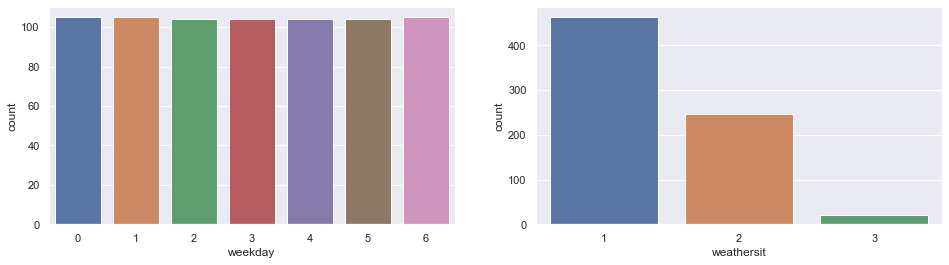

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(x='weekday', data=df, ax=axes[0])
sns.countplot(x='weathersit', data=df, ax=axes[1])

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: около 5000

Ответ: нормальное распределение.

<AxesSubplot:xlabel='cnt', ylabel='Density'>

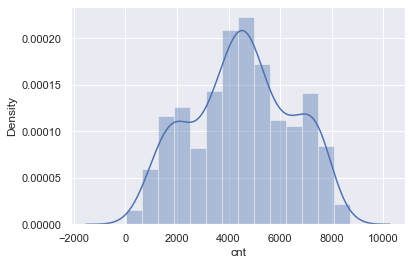

In [155]:
sns.distplot(df.cnt, kde=True)

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: да вроде нормальные графики. Похожие. Температура обычно ощущается более жаркой, чем она на самом деле. Только странно, что отрицательных температур нет, а прокат велосипедов в зимние месяцы - есть. Получается, что зимой в регионе температура держится около нуля. 

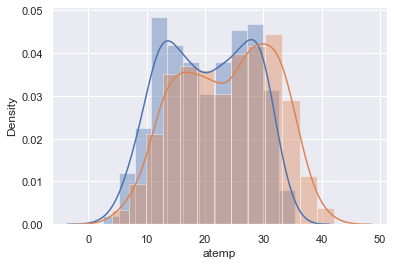

In [156]:
sns.distplot(df.temp, kde=True)
sns.distplot(df.atemp, kde=True)
plt.show()

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: вероятнее всего, это связано с графиками отпусков.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

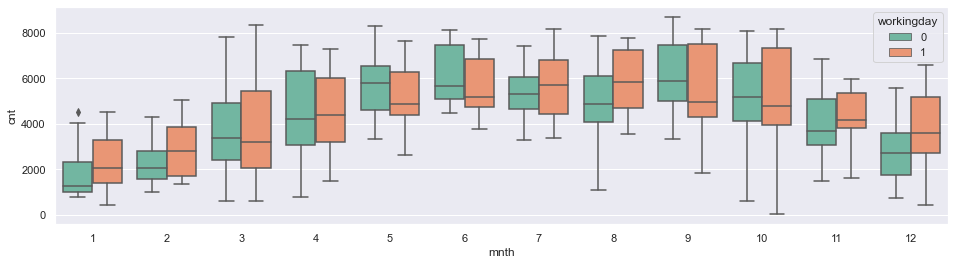

In [189]:
fig = plt.figure(figsize=(16, 4))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df, palette='Set2')

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

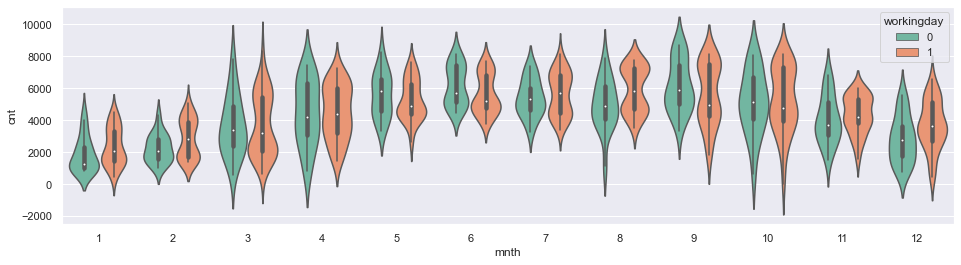

In [188]:
fig = plt.figure(figsize=(16, 4))
sns.violinplot(x='mnth', y='cnt', hue='workingday', data=df, palette='Set2')

## 8*. Со звёздочкой (5 баллов)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение:

In [196]:
df8 = df[['temp', 'atemp', 'windspeed(ms)']]
df8['atemp - temp'] = df8.atemp - df8.temp
df8.head()

,temp,atemp,windspeed(ms),atemp - temp
0,14.110847,18.18125,4.805490,4.070403
1,14.902598,17.68695,7.443949,2.784352
2,8.050924,9.47025,7.437060,1.419326
3,8.200000,10.60610,4.800998,2.406100
4,9.305237,11.46350,5.597810,2.158263


Чем значение в последнем столбце меньше, тем холоднее ощущается погода.

<AxesSubplot:xlabel='windspeed(ms)', ylabel='atemp - temp'>

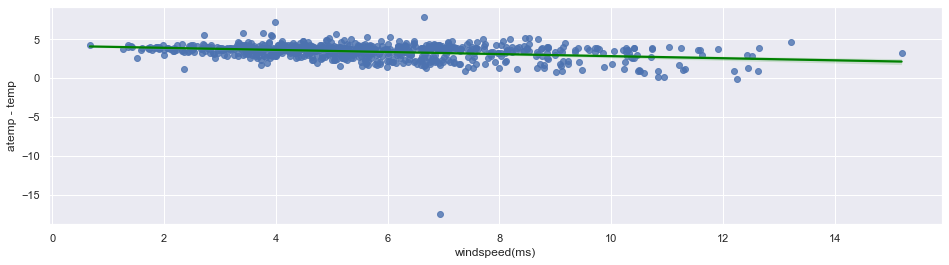

In [197]:
fig = plt.figure(figsize=(16, 4))
sns.regplot(data=df8, x='windspeed(ms)', y='atemp - temp', line_kws={'color': 'green'})

Зависимость между скоростью ветра и тем, насколько холоднее ощущется погода, есть, причем она линейная. Мне не нравится странный выброс около -15, давайте удалим его.

In [201]:
df8.drop(index=df8['atemp - temp'].idxmin(), inplace=True)

<AxesSubplot:xlabel='windspeed(ms)', ylabel='atemp - temp'>

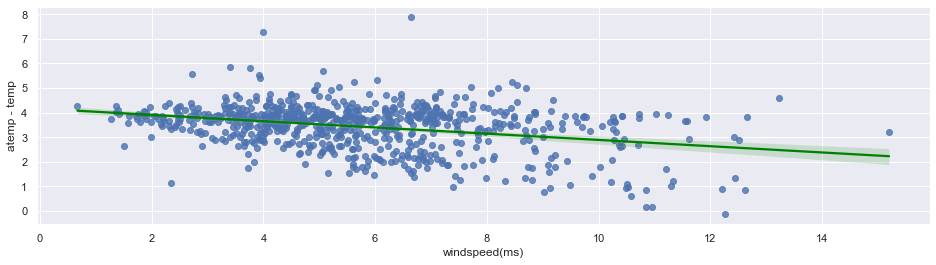

In [202]:
fig = plt.figure(figsize=(16, 4))
sns.regplot(data=df8, x='windspeed(ms)', y='atemp - temp', line_kws={'color': 'green'})

Без выброса всё выглядит лучше. Гипотеза о том, что чем сильнее ветер, тем холоднее ощущется погода, подтверждается.